## [AMPLab] AcousticBrainz task

In [12]:
data_dir = 'ab-duplicates100-2016-03-02'

In [4]:
!wget http://www.dtic.upf.edu/~aporter/amplab/2017/{data_dir}.tar.bz2

--2018-02-23 15:23:33--  http://www.dtic.upf.edu/~aporter/amplab/2017/ab-duplicates100-2016-03-02.tar.bz2
Resolving www.dtic.upf.edu (www.dtic.upf.edu)... 84.89.136.28
Connecting to www.dtic.upf.edu (www.dtic.upf.edu)|84.89.136.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140107852 (134M) [application/x-bzip2]
Saving to: ‘ab-duplicates100-2016-03-02.tar.bz2’

ab-duplicates100-20 100%[===================>] 133.62M  11.1MB/s    in 12s     

2018-02-23 15:23:45 (11.1 MB/s) - ‘ab-duplicates100-2016-03-02.tar.bz2’ saved [140107852/140107852]



In [ ]:
!tar xjf {data_dir}.tar.bz2

In [7]:
!wget https://raw.githubusercontent.com/MTG/essentia/master/src/examples/python/json_to_csv.py

--2018-02-23 15:28:45--  https://raw.githubusercontent.com/MTG/essentia/master/src/examples/python/json_to_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4638 (4.5K) [text/plain]
Saving to: ‘json_to_csv.py.2’

json_to_csv.py.2    100%[===================>]   4.53K  --.-KB/s    in 0s      

2018-02-23 15:28:45 (55.2 MB/s) - ‘json_to_csv.py.2’ saved [4638/4638]



In [ ]:
!python json_to_csv.py -i ab-duplicates100-2016-03-02/00/* -o test.csv --include \
metadata.audio_properties.length rhythm.bpm lowlevel.average_loudness

# Data pre-processing 

In [89]:
import os
import essentia.standard as es
from json_to_csv import convert_all

features = [
    'metadata.audio_properties.length',
    'metadata.audio_properties.replay_gain',
    'lowlevel.average_loudness',
    'rhythm.bpm',
    'rhythm.onset_rate',
#     'rhythm.beats_position.*',  # variable length
    'tonal.chords_histogram.*',
    'tonal.hpcp.mean.*',
    'tonal.key_key',
    'tonal.key_scale',
    'tonal.tuning_frequency'
]

csv_dir = 'csv'
data = []

try:
    os.mkdir(csv_dir)
except FileExistsError:
    pass

for item_dir in sorted(os.listdir(data_dir)):
    item_path = os.path.join(data_dir, item_dir)
    
    json_files = [os.path.join(item_path, file) for file in sorted(os.listdir(item_path))]
    csv_file = os.path.join(csv_dir, item_dir + '.csv')
    convert_all(json_files, csv_file, include=features)

Writing to csv/00.csv
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-0.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-1.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-10.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-11.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-12.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-13.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-14.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-15.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-16.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-17.json
Converting ab-duplicates100-2016-03-02/00/00c47ea6-3a10-4a32-b1f1-990ac756c6a0-18.json
Converting ab-duplicate

Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-1.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-10.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-11.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-12.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-13.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-14.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-15.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-16.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-17.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-18.json
Converting ab-duplicates100-2016-03-02/01/01471832-f446-43b9-be53-ce344c0c5134-19.json
Converting ab-duplicates100-2016-03-02/01/01

Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-30.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-31.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-32.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-33.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-34.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-35.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-36.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-37.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-38.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-39.json
Converting ab-duplicates100-2016-03-02/04/0432a2b7-614b-4389-b4fd-44ecdaddc84f-4.json
Converting ab-duplicates100-2016-03-02/04/04

Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-63.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-64.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-65.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-66.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-67.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-68.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-69.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-7.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-70.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-71.json
Converting ab-duplicates100-2016-03-02/05/053d552a-1718-42d0-82e8-2fdcc2d5b30e-72.json
Converting ab-duplicates100-2016-03-02/05/05

Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-2.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-20.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-21.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-22.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-23.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-24.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-25.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-26.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-27.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-28.json
Converting ab-duplicates100-2016-03-02/07/07c9f1a8-c11f-460e-b8ae-99081f6f6094-29.json
Converting ab-duplicates100-2016-03-02/07/07

Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-47.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-48.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-49.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-5.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-50.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-51.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-52.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-53.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-54.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-55.json
Converting ab-duplicates100-2016-03-02/0d/0d4800dc-0e53-4d85-90e1-a4a316e47b8e-56.json
Converting ab-duplicates100-2016-03-02/0d/0d

Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-19.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-2.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-20.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-21.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-22.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-23.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-24.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-25.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-26.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-27.json
Converting ab-duplicates100-2016-03-02/10/107647c9-a30a-4a7d-af12-2555999310b2-28.json
Converting ab-duplicates100-2016-03-02/10/10

Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-48.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-49.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-5.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-50.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-51.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-52.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-53.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-54.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-55.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-56.json
Converting ab-duplicates100-2016-03-02/14/14aa051a-051f-4faf-8a08-ed46dc32c65b-57.json
Converting ab-duplicates100-2016-03-02/14/14

Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-64.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-65.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-66.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-67.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-68.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-69.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-7.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-70.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-71.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-72.json
Converting ab-duplicates100-2016-03-02/15/15127932-c879-466e-b0f8-a1c5022d16e7-73.json
Converting ab-duplicates100-2016-03-02/15/15

Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-60.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-61.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-62.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-63.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-64.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-7.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-8.json
Converting ab-duplicates100-2016-03-02/16/1615f600-2a50-4299-8cb7-3c5d524d7e60-9.json
Converting ab-duplicates100-2016-03-02/16/167b224b-596f-4a57-a405-08bfee59df59-0.json
Converting ab-duplicates100-2016-03-02/16/167b224b-596f-4a57-a405-08bfee59df59-1.json
Converting ab-duplicates100-2016-03-02/16/167b224b-596f-4a57-a405-08bfee59df59-10.json
Converting ab-duplicates100-2016-03-02/16/167b22

Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-33.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-34.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-35.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-36.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-37.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-38.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-39.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-4.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-40.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-41.json
Converting ab-duplicates100-2016-03-02/17/17416564-fb6e-471c-a4ad-0bfc45292cd9-42.json
Converting ab-duplicates100-2016-03-02/17/17

Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-52.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-53.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-54.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-55.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-56.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-57.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-58.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-59.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-6.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-60.json
Converting ab-duplicates100-2016-03-02/1a/1a13c710-4b7e-4701-8968-cd61f2e58110-61.json
Converting ab-duplicates100-2016-03-02/1a/1a

Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-17.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-18.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-19.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-2.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-20.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-21.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-22.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-23.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-24.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-25.json
Converting ab-duplicates100-2016-03-02/1e/1e1d1f33-346c-4f9a-ad05-03aa715c2f37-26.json
Converting ab-duplicates100-2016-03-02/1e/1e

Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-37.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-38.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-39.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-4.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-40.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-41.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-42.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-43.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-44.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-45.json
Converting ab-duplicates100-2016-03-02/1e/1ebfca60-df29-4035-9d09-e0385d84ff55-46.json
Converting ab-duplicates100-2016-03-02/1e/1e

Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-61.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-62.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-63.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-64.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-65.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-66.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-67.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-68.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-69.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-7.json
Converting ab-duplicates100-2016-03-02/1f/1f518811-7cf9-4bdc-a656-0958e130f312-70.json
Converting ab-duplicates100-2016-03-02/1f/1f

Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-62.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-63.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-64.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-65.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-66.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-7.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-8.json
Converting ab-duplicates100-2016-03-02/20/2042ce91-f5fe-4fce-b451-b3354843b193-9.json
Writing to csv/21.csv
Converting ab-duplicates100-2016-03-02/21/21047249-7b3f-4651-acca-246669c081fd-0.json
Converting ab-duplicates100-2016-03-02/21/21047249-7b3f-4651-acca-246669c081fd-1.json
Converting ab-duplicates100-2016-03-02/21/21047249-7b3f-4651-acca-246669c081fd-10.json
Converting ab-duplicates10

Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-27.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-28.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-29.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-3.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-30.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-31.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-32.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-33.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-34.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-35.json
Converting ab-duplicates100-2016-03-02/22/22337e71-0bf8-4fa9-86eb-2f8e7e085474-36.json
Converting ab-duplicates100-2016-03-02/22/22

Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-54.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-55.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-56.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-57.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-58.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-6.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-7.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-8.json
Converting ab-duplicates100-2016-03-02/29/291758ed-60eb-4192-92af-367b1c754745-9.json
Converting ab-duplicates100-2016-03-02/29/297565c9-82f1-4eae-82bf-6dad231f6710-0.json
Converting ab-duplicates100-2016-03-02/29/297565c9-82f1-4eae-82bf-6dad231f6710-1.json
Converting ab-duplicates100-2016-03-02/29/297565c

Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-34.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-35.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-36.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-37.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-38.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-39.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-4.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-40.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-41.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-42.json
Converting ab-duplicates100-2016-03-02/2d/2d40c8b2-7524-49e3-af44-ebb924c5b023-43.json
Converting ab-duplicates100-2016-03-02/2d/2d

Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-61.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-62.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-63.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-64.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-65.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-66.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-67.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-7.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-8.json
Converting ab-duplicates100-2016-03-02/2e/2eb16581-560c-4a4d-82af-6f33e38fffad-9.json
Writing to csv/32.csv
Converting ab-duplicates100-2016-03-02/32/32c7e292-14f1-4080-bddf-ef852e0a4c59-0.json
Converting ab-duplicates1

Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-27.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-28.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-29.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-3.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-30.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-31.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-32.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-33.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-34.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-35.json
Converting ab-duplicates100-2016-03-02/34/3426c118-cef9-42ea-8ea6-e6e4598cfc45-36.json
Converting ab-duplicates100-2016-03-02/34/34

Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-55.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-56.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-57.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-58.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-59.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-6.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-60.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-61.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-62.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-63.json
Converting ab-duplicates100-2016-03-02/3d/3d7f2000-123d-4cac-862b-e04ead24c5f2-64.json
Converting ab-duplicates100-2016-03-02/3d/3d

Converting ab-duplicates100-2016-03-02/3f/3f5647db-6f12-4c36-94ea-2d06f2c7e8f9-9.json
Writing to csv/40.csv
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-0.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-1.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-10.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-11.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-12.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-13.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-14.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-15.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-16.json
Converting ab-duplicates100-2016-03-02/40/403d7903-a472-4a7d-887a-5d3c6482fe9c-17.json
Converting ab-duplicates

Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-14.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-15.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-16.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-17.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-18.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-19.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-2.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-20.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-21.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-22.json
Converting ab-duplicates100-2016-03-02/42/424c10aa-a857-4dc6-872e-2a8fb0b707f3-23.json
Converting ab-duplicates100-2016-03-02/42/42

Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-44.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-45.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-46.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-47.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-48.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-49.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-5.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-50.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-51.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-52.json
Converting ab-duplicates100-2016-03-02/44/440f60e8-0b25-4ec4-abb1-c6beec624ab0-53.json
Converting ab-duplicates100-2016-03-02/44/44

Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-4.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-40.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-41.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-42.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-43.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-44.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-45.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-46.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-47.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-48.json
Converting ab-duplicates100-2016-03-02/46/468c6f6f-4e68-494a-adac-96aebc754923-49.json
Converting ab-duplicates100-2016-03-02/46/46

Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-73.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-74.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-75.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-76.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-77.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-78.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-79.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-8.json
Converting ab-duplicates100-2016-03-02/47/474546e9-0b30-4881-9269-c6c1c8bbf07b-9.json
Writing to csv/48.csv
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-0.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-1.json
Converting ab-duplicates1

Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-76.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-77.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-78.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-79.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-8.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-80.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-81.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-82.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-83.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-84.json
Converting ab-duplicates100-2016-03-02/48/485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf-85.json
Converting ab-duplicates100-2016-03-02/48/48

Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-16.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-17.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-18.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-19.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-2.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-20.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-21.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-22.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-23.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-24.json
Converting ab-duplicates100-2016-03-02/4f/4f063cd8-1c74-4ef1-8d68-236123ef6438-25.json
Converting ab-duplicates100-2016-03-02/4f/4f

Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-5.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-50.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-51.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-52.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-53.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-54.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-55.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-56.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-57.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-58.json
Converting ab-duplicates100-2016-03-02/50/5098d0a8-d3c3-424e-9367-1f2610724410-59.json
Converting ab-duplicates100-2016-03-02/50/50

Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-1.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-10.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-11.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-12.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-13.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-14.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-15.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-16.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-17.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-18.json
Converting ab-duplicates100-2016-03-02/52/526bd613-fddd-4bd6-9137-ab709ac74cab-19.json
Converting ab-duplicates100-2016-03-02/52/52

Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-31.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-32.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-33.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-34.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-35.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-36.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-37.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-38.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-39.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-4.json
Converting ab-duplicates100-2016-03-02/56/568de193-cb26-494b-ba64-74275226d667-40.json
Converting ab-duplicates100-2016-03-02/56/56

Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-6.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-60.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-61.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-62.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-63.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-7.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-8.json
Converting ab-duplicates100-2016-03-02/59/597eae0b-ccb6-4076-b997-0ce940586076-9.json
Writing to csv/5a.csv
Converting ab-duplicates100-2016-03-02/5a/5aca0e28-b3dc-42b8-8d48-6af35332addc-0.json
Converting ab-duplicates100-2016-03-02/5a/5aca0e28-b3dc-42b8-8d48-6af35332addc-1.json
Converting ab-duplicates100-2016-03-02/5a/5aca0e28-b3dc-42b8-8d48-6af35332addc-10.json
Converting ab-duplicates100

Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-27.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-28.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-29.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-3.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-30.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-31.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-32.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-33.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-34.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-35.json
Converting ab-duplicates100-2016-03-02/5a/5ad78393-77c2-451e-beb1-074df7e06e57-36.json
Converting ab-duplicates100-2016-03-02/5a/5a

Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-39.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-4.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-40.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-41.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-42.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-43.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-44.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-45.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-46.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-47.json
Converting ab-duplicates100-2016-03-02/5b/5b20a7d0-adce-461b-852b-1e622bb25b2a-48.json
Converting ab-duplicates100-2016-03-02/5b/5b

Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-64.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-65.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-66.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-67.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-68.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-69.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-7.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-70.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-71.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-72.json
Converting ab-duplicates100-2016-03-02/5e/5e0aa7e4-01cb-441c-9fc2-d89e890cb981-73.json
Converting ab-duplicates100-2016-03-02/5e/5e

Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-85.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-86.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-87.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-88.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-89.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-9.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-90.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-91.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-92.json
Converting ab-duplicates100-2016-03-02/63/63dd7ef6-6d6e-44d5-a4d9-190e49223077-93.json
Writing to csv/65.csv
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-0.json
Converting ab-duplicate

Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-80.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-81.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-82.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-83.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-84.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-85.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-86.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-87.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-88.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-89.json
Converting ab-duplicates100-2016-03-02/65/659b4269-fe81-40e4-86e9-12879c09c9e6-9.json
Converting ab-duplicates100-2016-03-02/65/65

Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-77.json
Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-78.json
Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-79.json
Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-8.json
Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-80.json
Converting ab-duplicates100-2016-03-02/65/65ca55c8-d857-4a3b-9246-835b1e54fe4d-9.json
Writing to csv/6d.csv
Converting ab-duplicates100-2016-03-02/6d/6da76448-982a-4a01-b65b-9a710301c9c9-0.json
Converting ab-duplicates100-2016-03-02/6d/6da76448-982a-4a01-b65b-9a710301c9c9-1.json
Converting ab-duplicates100-2016-03-02/6d/6da76448-982a-4a01-b65b-9a710301c9c9-10.json
Converting ab-duplicates100-2016-03-02/6d/6da76448-982a-4a01-b65b-9a710301c9c9-11.json
Converting ab-duplicates100-2016-03-02/6d/6da76448-982a-4a01-b65b-9a710301c9c9-12.json
Converting ab-duplicates1

Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-20.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-21.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-22.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-23.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-24.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-25.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-26.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-27.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-28.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-29.json
Converting ab-duplicates100-2016-03-02/6d/6db17e6e-94d8-4794-9364-c761ad667fb1-3.json
Converting ab-duplicates100-2016-03-02/6d/6d

Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-44.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-45.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-46.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-47.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-48.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-49.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-5.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-50.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-51.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-52.json
Converting ab-duplicates100-2016-03-02/79/79d41dd0-d456-4d33-a36f-bfcc094c38ac-53.json
Converting ab-duplicates100-2016-03-02/79/79

Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-69.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-7.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-70.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-71.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-72.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-73.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-74.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-75.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-76.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-77.json
Converting ab-duplicates100-2016-03-02/7f/7fef28ab-aa1b-4368-8ffe-c128b58042dd-78.json
Converting ab-duplicates100-2016-03-02/7f/7f

Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-72.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-73.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-74.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-75.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-76.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-8.json
Converting ab-duplicates100-2016-03-02/83/838fb586-09c6-4b1d-903b-72ce8e39800c-9.json
Writing to csv/86.csv
Converting ab-duplicates100-2016-03-02/86/86788018-eb99-4de1-a3a1-e2004fe75ce9-0.json
Converting ab-duplicates100-2016-03-02/86/86788018-eb99-4de1-a3a1-e2004fe75ce9-1.json
Converting ab-duplicates100-2016-03-02/86/86788018-eb99-4de1-a3a1-e2004fe75ce9-10.json
Converting ab-duplicates100-2016-03-02/86/86788018-eb99-4de1-a3a1-e2004fe75ce9-11.json
Converting ab-duplicates1

Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-32.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-33.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-34.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-35.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-36.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-37.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-38.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-39.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-4.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-40.json
Converting ab-duplicates100-2016-03-02/87/8717d821-88ef-4873-bd91-32a0b72ba415-41.json
Converting ab-duplicates100-2016-03-02/87/87

Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-65.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-66.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-67.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-68.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-69.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-7.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-70.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-71.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-72.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-73.json
Converting ab-duplicates100-2016-03-02/91/917f2be3-065e-4d1e-8a76-1b50abd1ad95-74.json
Converting ab-duplicates100-2016-03-02/91/91

Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-60.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-61.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-62.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-63.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-64.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-65.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-66.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-67.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-68.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-69.json
Converting ab-duplicates100-2016-03-02/92/929c9c81-cae2-4f75-ba67-8fa4c524a569-7.json
Converting ab-duplicates100-2016-03-02/92/92

Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-79.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-8.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-80.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-81.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-82.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-83.json
Converting ab-duplicates100-2016-03-02/99/99c004fb-ba87-41be-afd4-e0157b40516a-9.json
Writing to csv/9a.csv
Converting ab-duplicates100-2016-03-02/9a/9a5a1058-0c02-48a1-8d3c-9ee5618ef10d-0.json
Converting ab-duplicates100-2016-03-02/9a/9a5a1058-0c02-48a1-8d3c-9ee5618ef10d-1.json
Converting ab-duplicates100-2016-03-02/9a/9a5a1058-0c02-48a1-8d3c-9ee5618ef10d-10.json
Converting ab-duplicates100-2016-03-02/9a/9a5a1058-0c02-48a1-8d3c-9ee5618ef10d-11.json
Converting ab-duplicates1

Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-22.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-23.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-24.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-25.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-26.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-27.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-28.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-29.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-3.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-30.json
Converting ab-duplicates100-2016-03-02/9f/9ffabbe4-e078-4906-80a7-3a02b537e251-31.json
Converting ab-duplicates100-2016-03-02/9f/9f

Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-56.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-57.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-58.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-59.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-6.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-60.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-61.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-62.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-63.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-64.json
Converting ab-duplicates100-2016-03-02/a1/a15e2d0a-efcb-4f4f-ad54-22a4879bbcf9-65.json
Converting ab-duplicates100-2016-03-02/a1/a1

Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-75.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-76.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-77.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-78.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-79.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-8.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-80.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-81.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-82.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-83.json
Converting ab-duplicates100-2016-03-02/a5/a502f559-f70c-4e0d-a5e5-e0cc319d0bd7-84.json
Converting ab-duplicates100-2016-03-02/a5/a5

Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-17.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-18.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-19.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-2.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-20.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-21.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-22.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-23.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-24.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-25.json
Converting ab-duplicates100-2016-03-02/a9/a9a83384-3da3-4c84-af6d-33fcdb1c3e27-26.json
Converting ab-duplicates100-2016-03-02/a9/a9

Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-41.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-42.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-43.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-44.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-45.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-46.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-47.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-48.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-49.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-5.json
Converting ab-duplicates100-2016-03-02/ab/abcf042e-1f92-499e-8c2d-418e495ec361-50.json
Converting ab-duplicates100-2016-03-02/ab/ab

Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-105.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-106.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-107.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-108.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-109.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-11.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-110.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-111.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-112.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-12.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-13.json
Converting ab-duplicates100-2016-03

Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-91.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-92.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-93.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-94.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-95.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-96.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-97.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-98.json
Converting ab-duplicates100-2016-03-02/af/afbd4865-01bc-4146-ac00-e2a66396eaf3-99.json
Writing to csv/b2.csv
Converting ab-duplicates100-2016-03-02/b2/b2181aae-5cba-496c-bb0c-b4cc0109ebf8-0.json
Converting ab-duplicates100-2016-03-02/b2/b2181aae-5cba-496c-bb0c-b4cc0109ebf8-1.json
Converting ab-duplicate

Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-13.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-14.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-15.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-16.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-17.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-18.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-19.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-2.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-20.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-21.json
Converting ab-duplicates100-2016-03-02/b2/b2389a72-71f9-425c-b4ea-f4ab7eb92c61-22.json
Converting ab-duplicates100-2016-03-02/b2/b2

Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-29.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-3.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-30.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-31.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-32.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-33.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-34.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-35.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-36.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-37.json
Converting ab-duplicates100-2016-03-02/b2/b2b50082-0bd1-4702-9a95-3499a4e5781b-38.json
Converting ab-duplicates100-2016-03-02/b2/b2

Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-26.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-27.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-28.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-29.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-3.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-30.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-31.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-32.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-33.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-34.json
Converting ab-duplicates100-2016-03-02/b4/b4184747-0157-41be-ae44-e3a6a0c13272-35.json
Converting ab-duplicates100-2016-03-02/b4/b4

Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-45.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-46.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-47.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-48.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-49.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-5.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-50.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-51.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-52.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-53.json
Converting ab-duplicates100-2016-03-02/b7/b720b11f-2c00-4f48-83b9-4aa9d3207e8c-54.json
Converting ab-duplicates100-2016-03-02/b7/b7

Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-40.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-41.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-42.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-43.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-44.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-45.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-46.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-47.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-48.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-49.json
Converting ab-duplicates100-2016-03-02/b8/b849acd4-0638-49ea-8e40-7391613d4890-5.json
Converting ab-duplicates100-2016-03-02/b8/b8

Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-38.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-39.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-4.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-40.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-41.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-42.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-43.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-44.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-45.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-46.json
Converting ab-duplicates100-2016-03-02/bc/bcbe3d2e-e95f-46f4-8b5f-9e8a8bb71d36-47.json
Converting ab-duplicates100-2016-03-02/bc/bc

Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-55.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-56.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-57.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-58.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-6.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-7.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-8.json
Converting ab-duplicates100-2016-03-02/bf/bf5197ab-31f0-4861-b81b-91372145dc8e-9.json
Converting ab-duplicates100-2016-03-02/bf/bf58a93c-1a90-43aa-b804-53f5a4f5307f-0.json
Converting ab-duplicates100-2016-03-02/bf/bf58a93c-1a90-43aa-b804-53f5a4f5307f-1.json
Converting ab-duplicates100-2016-03-02/bf/bf58a93c-1a90-43aa-b804-53f5a4f5307f-10.json
Converting ab-duplicates100-2016-03-02/bf/bf58a93

Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-21.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-22.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-23.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-24.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-25.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-26.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-27.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-28.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-29.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-3.json
Converting ab-duplicates100-2016-03-02/c1/c19db4d3-6640-4732-a0b2-e358ed80c5c4-30.json
Converting ab-duplicates100-2016-03-02/c1/c1

Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-17.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-18.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-19.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-2.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-20.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-21.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-22.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-23.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-24.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-25.json
Converting ab-duplicates100-2016-03-02/c1/c1d63906-f64a-4cd1-9873-9f3a9f98883c-26.json
Converting ab-duplicates100-2016-03-02/c1/c1

Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-14.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-15.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-16.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-17.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-18.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-19.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-2.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-20.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-21.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-22.json
Converting ab-duplicates100-2016-03-02/c3/c3fe2b67-a715-42c7-9e3c-2e353620a11d-23.json
Converting ab-duplicates100-2016-03-02/c3/c3

Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-3.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-30.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-31.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-32.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-33.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-34.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-35.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-36.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-37.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-38.json
Converting ab-duplicates100-2016-03-02/c7/c7c25302-69ab-4a9d-b967-23cbc6793854-39.json
Converting ab-duplicates100-2016-03-02/c7/c7

Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-63.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-64.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-65.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-66.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-67.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-68.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-69.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-7.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-70.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-71.json
Converting ab-duplicates100-2016-03-02/c9/c9b373a4-99cd-41c5-ab97-582a0906e304-72.json
Converting ab-duplicates100-2016-03-02/c9/c9

Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-23.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-24.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-25.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-26.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-27.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-28.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-29.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-3.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-30.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-31.json
Converting ab-duplicates100-2016-03-02/cc/cc480502-bfe8-4bd5-b98b-feba018698f0-32.json
Converting ab-duplicates100-2016-03-02/cc/cc

Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-40.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-41.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-42.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-43.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-44.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-45.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-46.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-47.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-48.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-49.json
Converting ab-duplicates100-2016-03-02/d0/d057c75d-04eb-438f-be0b-74f629f2953c-5.json
Converting ab-duplicates100-2016-03-02/d0/d0

Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-55.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-56.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-57.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-58.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-59.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-6.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-60.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-61.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-62.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-63.json
Converting ab-duplicates100-2016-03-02/da/daaee15a-8a4c-4275-a7c1-5b6211f0ec69-64.json
Converting ab-duplicates100-2016-03-02/da/da

Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-11.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-12.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-13.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-14.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-15.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-16.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-17.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-18.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-19.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-2.json
Converting ab-duplicates100-2016-03-02/de/de7210fe-bbb3-4c91-80d1-14696dae558a-20.json
Converting ab-duplicates100-2016-03-02/de/de

Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-39.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-4.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-40.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-41.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-42.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-43.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-44.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-45.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-46.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-47.json
Converting ab-duplicates100-2016-03-02/de/de896c41-463d-4eaa-8fe4-d826e2afa0f8-48.json
Converting ab-duplicates100-2016-03-02/de/de

Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-5.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-50.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-51.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-52.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-53.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-54.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-55.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-56.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-57.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-58.json
Converting ab-duplicates100-2016-03-02/e0/e097e9bc-8263-4e24-a6e6-8fa326b506c3-59.json
Converting ab-duplicates100-2016-03-02/e0/e0

Writing to csv/e3.csv
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-0.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-1.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-10.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-11.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-12.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-13.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-14.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-15.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-16.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-17.json
Converting ab-duplicates100-2016-03-02/e3/e33d52b7-2ed6-4889-89f4-7a9e696eac37-18.json
Converting ab-duplicate

Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-33.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-34.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-35.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-36.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-37.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-38.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-39.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-4.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-40.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-41.json
Converting ab-duplicates100-2016-03-02/eb/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-42.json
Converting ab-duplicates100-2016-03-02/eb/eb

Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-50.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-51.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-52.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-53.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-54.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-55.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-56.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-57.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-58.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-59.json
Converting ab-duplicates100-2016-03-02/ed/ed8d1b3b-8757-447a-baba-3efe027f2765-6.json
Converting ab-duplicates100-2016-03-02/ed/ed

Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-37.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-38.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-39.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-4.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-40.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-41.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-42.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-43.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-44.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-45.json
Converting ab-duplicates100-2016-03-02/ee/ee898790-133f-445a-874f-d996abd843af-46.json
Converting ab-duplicates100-2016-03-02/ee/ee

Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-33.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-34.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-35.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-36.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-37.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-38.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-39.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-4.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-40.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-41.json
Converting ab-duplicates100-2016-03-02/f2/f2cf4090-2f14-419a-91ac-734193f2b5f3-42.json
Converting ab-duplicates100-2016-03-02/f2/f2

Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-1.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-10.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-11.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-12.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-13.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-14.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-15.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-16.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-17.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-18.json
Converting ab-duplicates100-2016-03-02/f8/f816fd40-e1e3-4b27-9e95-1bdf264b98e2-19.json
Converting ab-duplicates100-2016-03-02/f8/f8

Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-29.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-3.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-30.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-31.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-32.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-33.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-34.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-35.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-36.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-37.json
Converting ab-duplicates100-2016-03-02/f9/f980fc14-e29b-481d-ad3a-5ed9b4ab6340-38.json
Converting ab-duplicates100-2016-03-02/f9/f9

In [73]:
data.values[:,1]

array([167.392654419, 173.21795654299999, 171.173339844, 171.20652771,
       171.173339844, 171.160003662, 170.720001221, 171.160003662,
       170.720001221, 172.146942139, 170.720001221, 171.20652771,
       169.090606689, 171.049789429, 171.20652771, 171.20652771,
       171.23265075700002, 170.893066406, 172.852249146, 172.175964355,
       172.120819092, 169.293334961, 170.720001221, 170.762451172,
       170.720001221, 169.293334961, 170.720001221, 172.38494873,
       168.803268433, 169.34312439, 171.223937988, 168.298233032,
       172.38494873, 167.137237549, 168.298233032, 170.720001221,
       170.78276062, 170.78276062, 170.78276062, 171.223937988,
       170.78276062, 170.78276062, 170.78276062, 171.223937988,
       170.78276062, 170.78276062, 170.720001221, 170.78276062,
       171.223937988, 170.01651001, 169.34312439, 171.154281616,
       172.120819092, 171.20652771, 172.38494873, 172.38494873,
       172.38494873, 172.17306518599997, 172.38494873, 172.38494873,
    

In [91]:
import numpy as np
import pandas as pd

for csv_file in os.listdir(csv_dir):
    csv_path = os.path.join(csv_dir, csv_file)
    data = pd.read_csv(csv_path)
    
    break

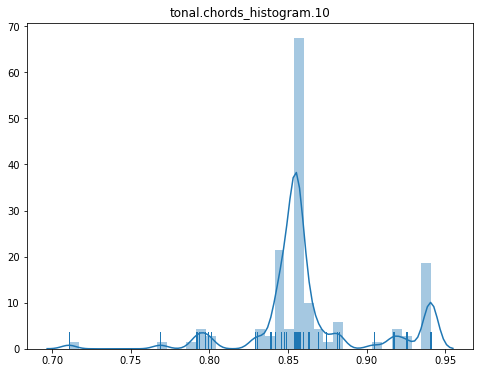

In [154]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

def plot_hist(data, index):
    plt.figure(figsize=(8,6))
    label = data.columns[index]
    plt.title(label)
#     plt.xlabel('Length (s)')
    sb.distplot(list(data.values[:,1]), rug=True)
    plt.savefig(label + '.png')
    
plot_hist(data, 8)

In [99]:
values = data.values[:,1]
mean = np.mean(values)

In [123]:
values

array([0.9248247742649999, 0.799272179604, 0.830550789833,
       0.8628116846080001, 0.8626298308370001, 0.869396150112,
       0.8546082973479999, 0.869396150112, 0.8546082973479999,
       0.792491972446, 0.8545891046520001, 0.859379887581,
       0.8418704867360001, 0.8291803598399999, 0.8636271953579999,
       0.8636271953579999, 0.838796913624, 0.8456641435619999,
       0.7107024192810001, 0.79142421484, 0.793563961983,
       0.9404838681219999, 0.8545224666600001, 0.856527149677,
       0.857408463955, 0.9403165578839999, 0.8545891642569999,
       0.8455041646960001, 0.87389087677, 0.940800249577, 0.84902971983,
       0.881185054779, 0.8455041646960001, 0.9045182466509999,
       0.881185054779, 0.857408463955, 0.854404807091, 0.8548982739450001,
       0.854404807091, 0.84902971983, 0.854404807091, 0.854404807091,
       0.854404807091, 0.857678711414, 0.8548982739450001, 0.854404807091,
       0.8545224666600001, 0.854404807091, 0.85707116127,
       0.9254564046860001, 0

In [145]:
lens = {}

features = [
    'metadata.audio_properties.length',
    'metadata.audio_properties.replay_gain',
    'lowlevel.average_loudness',
    'rhythm.bpm',
    'rhythm.onset_rate',
#     'tonal.chords_histogram.*',
#     'tonal.hpcp.mean.*',
    'tonal.tuning_frequency'
]

for name, values in data[features].iteritems():
    
    lens[name] = len(values[np.abs(values - np.mean(values)) > 2*np.std(values)])

In [146]:
lens

{'lowlevel.average_loudness': 10,
 'metadata.audio_properties.length': 7,
 'metadata.audio_properties.replay_gain': 6,
 'rhythm.bpm': 8,
 'rhythm.onset_rate': 5,
 'tonal.tuning_frequency': 3}